In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score
from sklearn.preprocessing import LabelEncoder

In [6]:
np.random.seed(42)
random.seed(42)

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
vdem = pd.read_csv('/content/drive/MyDrive/V-Dem-CY-Full+Others-v14.csv')

<ipython-input-8-4e4015fcbf94>:1: DtypeWarning: Columns (364,365,366,399,415,804,836,837,924,1240,1257,1486,3094,3168,3169,3341,3342,3344,3345,3347,3350,3352) have mixed types. Specify dtype option on import or set low_memory=False.
  vdem = pd.read_csv('/content/drive/MyDrive/V-Dem-CY-Full+Others-v14.csv')


In [9]:
vdem.keys()

Index(['country_name', 'country_text_id', 'country_id', 'year',
       'historical_date', 'project', 'historical', 'histname', 'codingstart',
       'codingend',
       ...
       'e_mipopula', 'e_miurbani', 'e_pefeliex', 'e_wb_pop', 'e_pechmor',
       'e_miinteco', 'e_civil_war', 'e_miinterc', 'e_pt_coup',
       'e_pt_coup_attempts'],
      dtype='object', length=4607)

In [10]:
keys = list(vdem.keys())
len(keys)

4607

In [11]:
# for model dataset: getting rid of vdem model characteristic columns and different scaled estimates
cleaned_keys = []
for k in keys:
    if ('code' not in k) and ('_sd' not in k) and ('_3C' not in k) and ('_4C' not in k) and ('_5C' not in k):
        if ('_mean' not in k) and ('_nr' not in k) and ('_osp' not in k) and ('_pct' not in k) and ('_ord' not in k):
            if ('_mode' not in k):
                cleaned_keys.append(k)

In [12]:
len(cleaned_keys)

1060

In [13]:
nr_keys = []
for k in keys:
    if '_nr' in k:
        nr_keys.append(k)

In [14]:
test = vdem[(vdem['year'] > 1960)]
test = test[test['e_wb_pop'] > 50_000_000]
test[nr_keys].describe()

,v2eldonate_nr,v2elpubfin_nr,v2elembaut_nr,v2elembcap_nr,v2elmulpar_nr,v2elrgstry_nr,v2elvotbuy_nr,v2elirreg_nr,v2elintim_nr,v2elpeace_nr,...,v2medentrain_nr,v2edscpatriot_nr,v2edscpatriotcb_nr,v2edscextracurr_nr,v2edtequal_nr,v2temonitor_nr,v2edteunion_nr,v2edteunionindp_nr,v2edtehire_nr,v2edtefire_nr
count,1252.000000,1252.000000,1252.000000,1252.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,...,1223.000000,1223.000000,1223.000000,1223.000000,1223.000000,1223.000000,1223.000000,1223.000000,1223.000000,1223.000000
mean,10.214058,10.191693,9.980831,9.805911,9.517544,9.172515,9.470760,9.453216,9.456140,9.269006,...,6.694195,6.850368,7.014718,6.804579,6.816844,6.531480,6.843009,6.260016,6.724448,6.699918
std,5.274907,5.301765,5.207258,5.178959,4.954158,4.967585,4.787327,4.796978,4.831726,4.744267,...,4.195862,4.012625,4.149590,4.091256,4.117443,3.928216,4.175748,4.178242,4.128277,4.161714
min,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
50%,8.000000,8.000000,8.000000,8.000000,8.000000,7.000000,8.000000,8.000000,8.000000,8.000000,...,6.000000,6.000000,6.000000,5.000000,6.000000,5.000000,5.000000,5.000000,6.000000,6.000000
75%,14.000000,14.000000,13.000000,13.000000,13.000000,12.000000,12.000000,12.000000,12.000000,12.000000,...,9.000000,10.000000,10.000000,10.000000,10.000000,9.000000,10.000000,9.000000,10.000000,10.000000
max,30.000000,31.000000,30.000000,29.000000,23.000000,24.000000,25.000000,24.000000,24.000000,23.000000,...,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000


In [15]:
vdem_pop = vdem[vdem['year'] >= 1960][cleaned_keys]

In [16]:
sorted(vdem_pop['country_name'].unique())

['Afghanistan',
 'Albania',
 'Algeria',
 'Angola',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Bulgaria',
 'Burkina Faso',
 'Burma/Myanmar',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Georgia',
 'German Democratic Republic',
 'Germany',
 'Ghana',
 'Greece',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',
 'Haiti',
 'Honduras',
 'Hong Kong',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iran',
 'Iraq',
 'Ireland'

In [17]:
vdem_pop.describe()

,country_id,year,project,historical,codingstart,codingend,codingstart_contemp,codingend_contemp,codingstart_hist,codingend_hist,...,e_mipopula,e_miurbani,e_pefeliex,e_wb_pop,e_pechmor,e_miinteco,e_civil_war,e_miinterc,e_pt_coup,e_pt_coup_attempts
count,10729.000000,10729.000000,10729.000000,10729.000000,10729.000000,10729.000000,10729.000000,10729.000000,4492.000000,4492.000000,...,5.862000e+03,5566.000000,5728.000000,1.018200e+04,10267.000000,6341.000000,6677.000000,6341.000000,9509.000000,9509.000000
mean,96.736881,1992.536956,0.006338,0.418678,1868.147824,2022.737720,1910.344487,2022.737720,1802.082814,1922.870882,...,2.653969e+04,0.336969,62.576023,3.261888e+07,82.546254,0.055985,0.079976,0.136414,0.022190,0.044694
std,57.743616,18.437591,0.112414,0.493365,61.466914,3.108226,22.461710,3.108226,22.611022,11.170000,...,1.029548e+05,0.227368,12.666660,1.193799e+08,83.343056,0.229911,0.271276,0.343255,0.155639,0.238317
min,3.000000,1960.000000,0.000000,0.000000,1789.000000,1975.000000,1900.000000,1975.000000,1789.000000,1918.000000,...,4.166200e+01,0.044000,30.810000,4.170000e+04,1.470000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,49.000000,1977.000000,0.000000,0.000000,1789.000000,2023.000000,1900.000000,2023.000000,1789.000000,1920.000000,...,2.053856e+03,0.182000,51.443500,2.367802e+06,16.900000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,92.000000,1993.000000,0.000000,0.000000,1900.000000,2023.000000,1900.000000,2023.000000,1789.000000,1920.000000,...,5.944719e+03,0.302000,64.851500,7.179500e+06,50.600000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,140.000000,2009.000000,0.000000,1.000000,1903.000000,2023.000000,1912.000000,2023.000000,1811.000000,1920.000000,...,1.518663e+04,0.414000,73.626250,2.129082e+07,126.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,236.000000,2023.000000,2.000000,1.000000,2011.000000,2023.000000,2011.000000,2023.000000,1878.000000,2010.000000,...,1.262645e+06,2.430000,84.580000,1.417173e+09,423.000000,1.000000,1.000000,1.000000,2.000000,4.000000


In [18]:
def top_correlations(base_df, column: str):
    """
    Compute correlation for each column in the DataFrame with the specified column.
    """
    df = base_df.dropna(subset=[column])
    if column not in df.columns:
        raise ValueError(f"Column '{column}' not found in DataFrame.")

    df = df.select_dtypes(include=["number"]) #only numerical data

    correlations = df.corr()[column].drop(labels=[column])  #exclude self-correlation
    top_correlations = correlations.abs().sort_values(ascending=False) #sort by absolute value
    top_100 = top_correlations.head(500).index.tolist()

    return top_100, correlations


def print_correlations(top, corr_values, num, count_flag=0):
    """
    Prints and returns the top correlations that meet the avaliable data count flag.
    """
    filtered_top = []

    for col in top[:num]:
        if vdem[col].count() > count_flag:
            #print(f"{col}: {corr_values[col]:.4f};                    " + "Count: " + str(vdem[col].count()))
            filtered_top.append(col)
    return filtered_top

def imputing_model(base_df, column: str, num_feats = 500, split = 5, impute = True):
    """
    Train and evaluate a model to impute missing values in the specified column.

    Random Forest is for any vdem data we will impute, not sure if will use yet.
    """

    if len(base_df[column].unique()) > 10:
        model = RandomForestRegressor
        metric = r2_score
        alpha_mod = 0.01
    else:
        if impute:
            model = RandomForestClassifier
        else:
            model = DecisionTreeClassifier
        metric = accuracy_score
        alpha_mod = 0


    #making sure the training df has no nulls for column to be imputed
    df = base_df.dropna(subset=[column])
    top, corrs = top_correlations(base_df, column)
    filtered_top = print_correlations(top, corrs, 500, 15000)

    X = df[filtered_top[:num_feats]]
    y = df[column]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #20% saved for test
    clf = model(min_samples_split = split, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = metric(y_test, y_pred)
    print("Train Accuracy:", metric(y_train, clf.predict(X_train)))
    print("Test Accuracy:", accuracy)
    plt.scatter(y_test, y_pred, alpha=0.01 + alpha_mod)
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title("Actual vs. Predicted Values")
    plt.show()

    print("Importances for", column)

    importances = clf.feature_importances_
    std = np.std([clf.feature_importances_ for _ in range(100)], axis=0)
    features = X.columns

    indices = np.argsort(importances)[-30:][::-1]
    top_features = features[indices]
    top_importances = importances[indices]
    top_std = std[indices]
    plt.figure(figsize=(16, 12))
    plt.barh(top_features, top_importances, xerr=top_std, align='center')
    plt.xlabel("Feature Importance")
    plt.ylabel("Feature")
    plt.gca().invert_yaxis()  #To display the highest importance at the top
    plt.show()

    return clf, filtered_top, corrs

Train Accuracy: 1.0
Test Accuracy: 0.9532882606023356


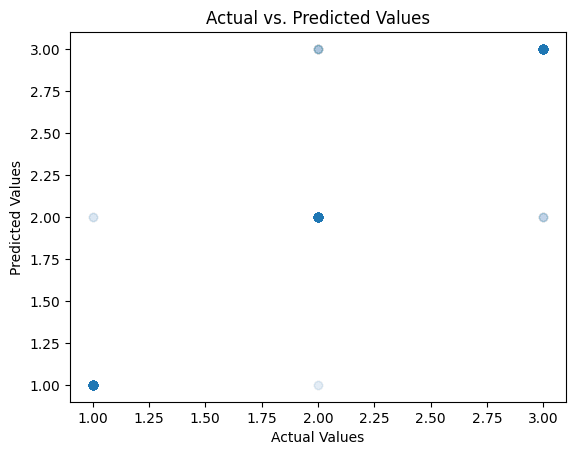

Importances for e_fh_status


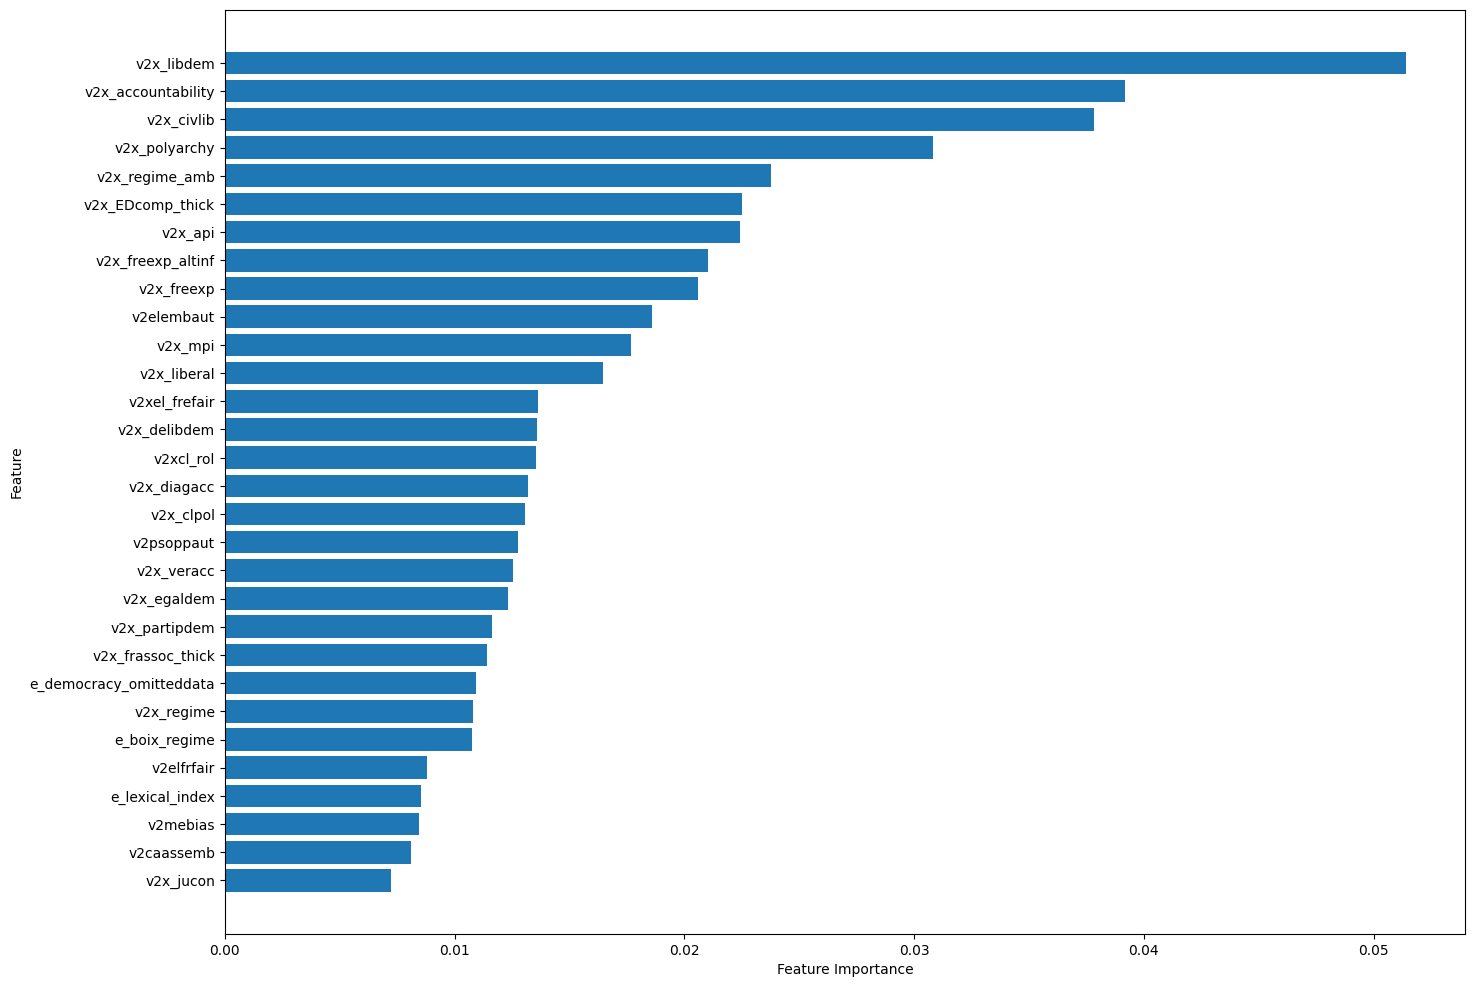

In [19]:
status_model, status_top, status_corrs = imputing_model(vdem_pop, 'e_fh_status', split = 2)

Train Accuracy: 1.0
Test Accuracy: 0.8721573448063922


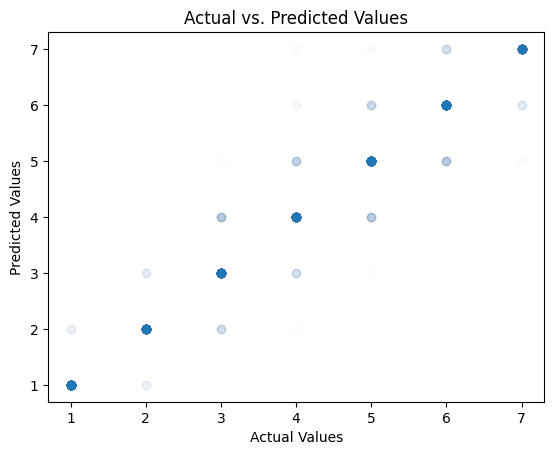

Importances for e_fh_cl


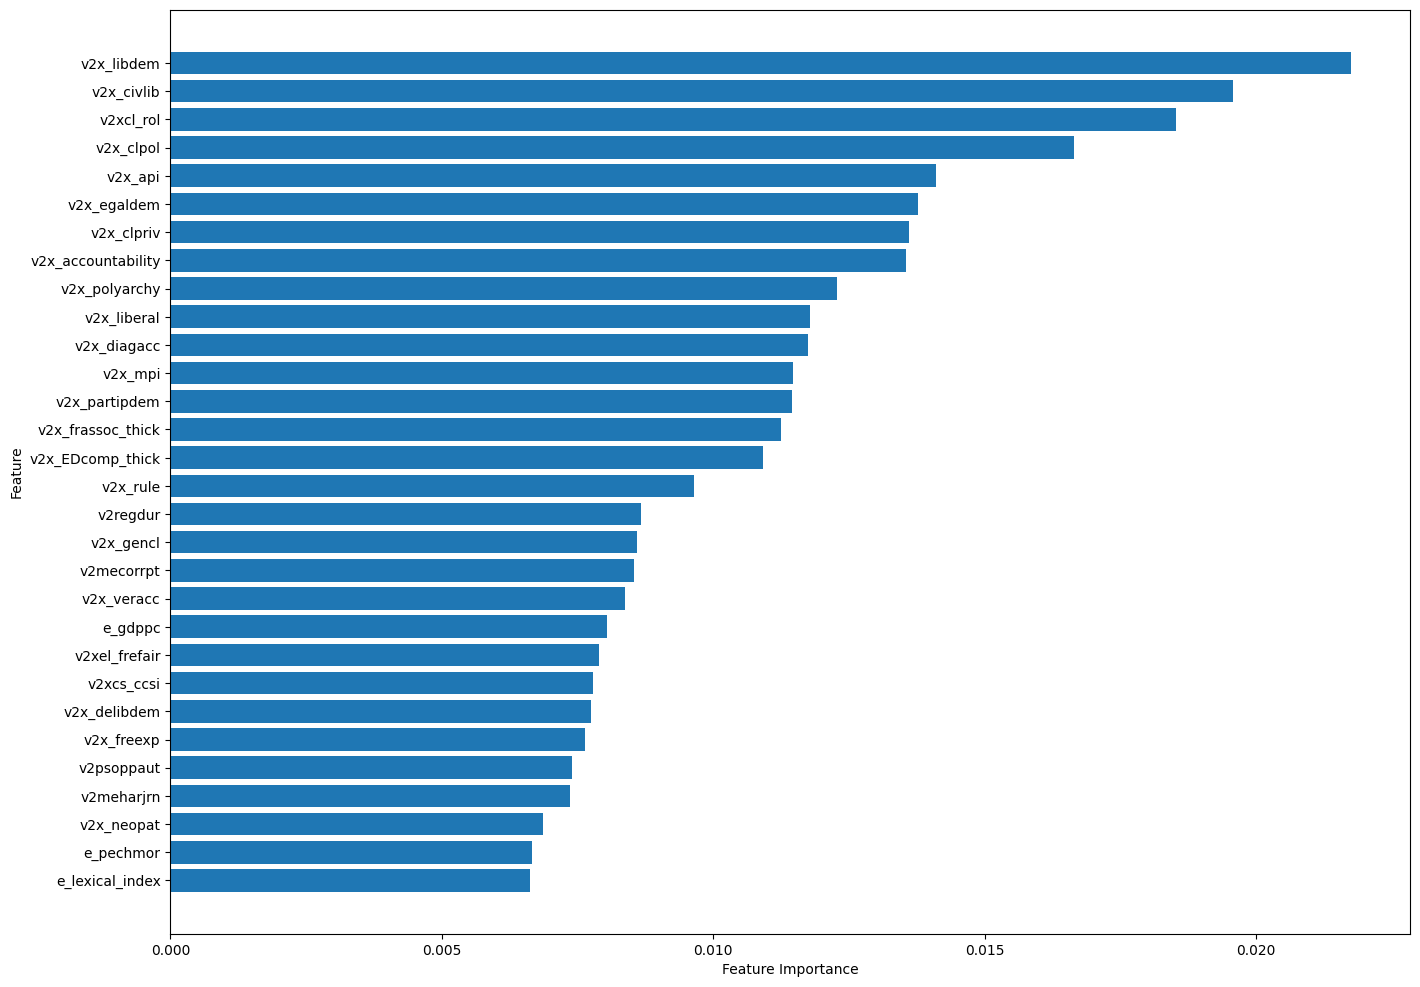

In [20]:
cl_model, cl_top, cl_corrs = imputing_model(vdem_pop, 'e_fh_cl', split = 2)

Train Accuracy: 1.0
Test Accuracy: 0.8746158574062692


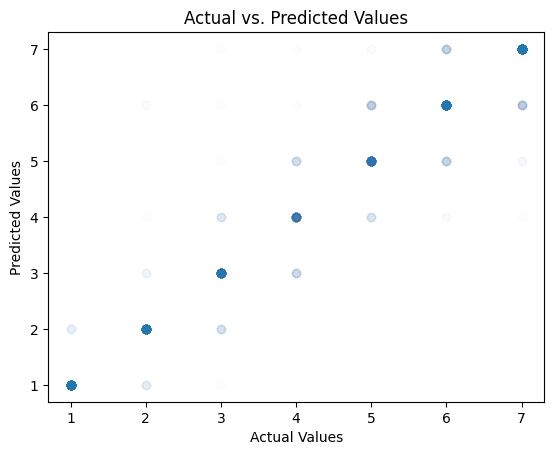

Importances for e_fh_pr


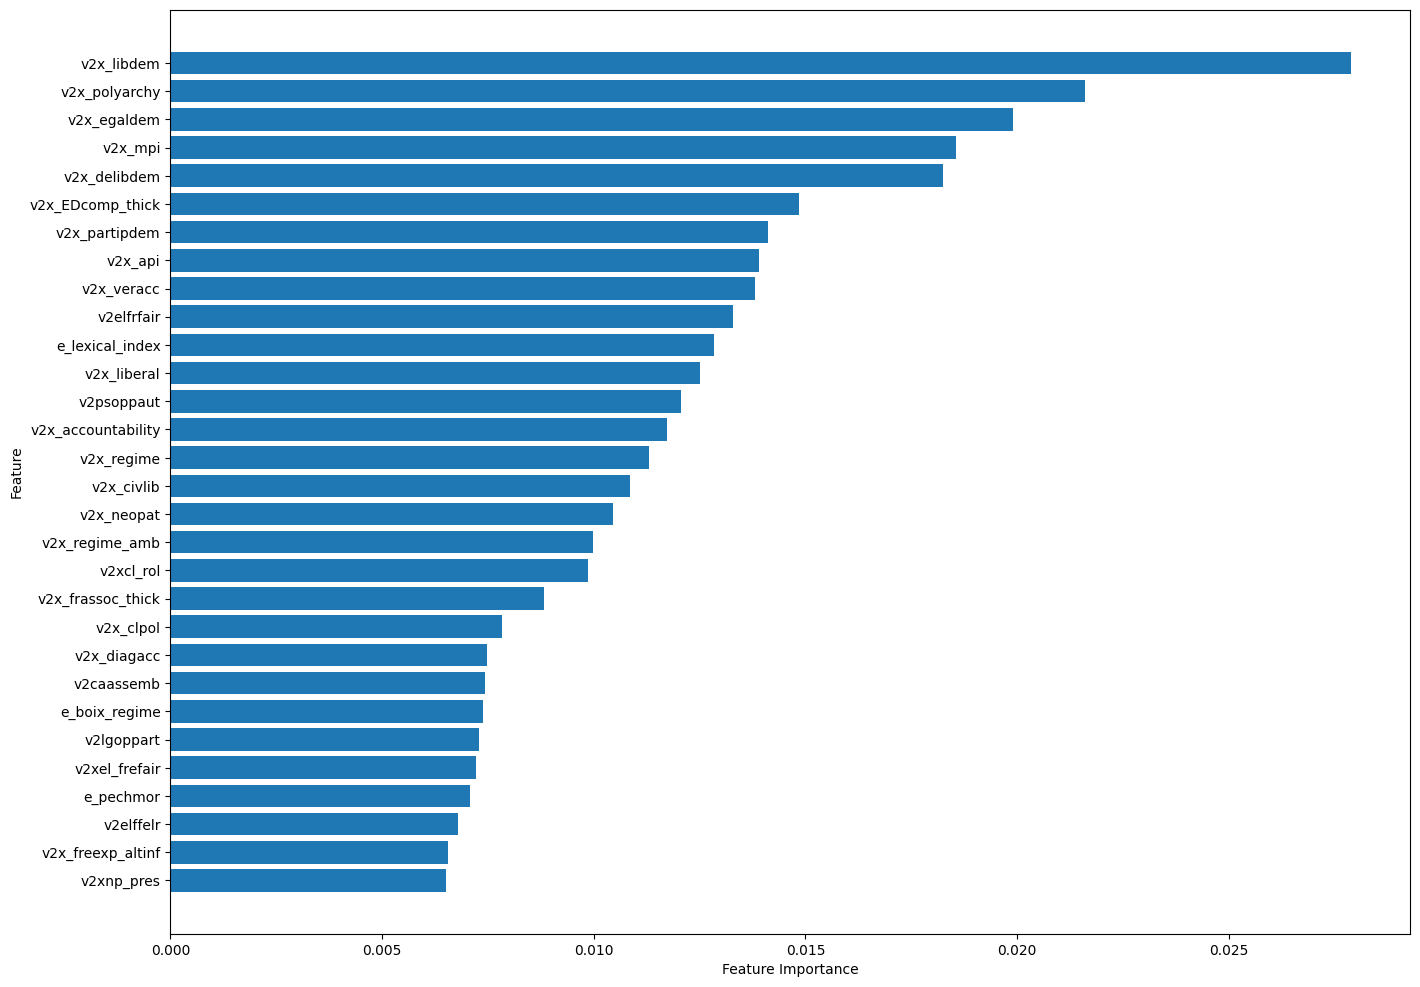

In [21]:
pr_model, pr_top, pr_corrs = imputing_model(vdem_pop, 'e_fh_pr', split = 2)

In [22]:
vdem_uds = vdem.dropna(subset=['e_uds_median'])[cleaned_keys]
vdem_uds.describe()

,country_id,year,project,historical,codingstart,codingend,codingstart_contemp,codingend_contemp,codingstart_hist,codingend_hist,...,e_mipopula,e_miurbani,e_pefeliex,e_wb_pop,e_pechmor,e_miinteco,e_civil_war,e_miinterc,e_pt_coup,e_pt_coup_attempts
count,9258.00000,9258.000000,9258.000000,9258.000000,9258.000000,9258.000000,9258.000000,9258.000000,4521.000000,4521.000000,...,6.553000e+03,6219.000000,5691.000000,7.918000e+03,9168.000000,7020.000000,7784.000000,7020.000000,8953.000000,8953.000000
mean,91.63545,1983.299633,0.010369,0.488334,1859.516958,2022.659430,1909.043962,2022.659430,1801.230259,1922.668879,...,2.777391e+04,0.331776,63.642585,3.231053e+07,100.197358,0.055556,0.074769,0.135755,0.025243,0.051491
std,57.18047,18.235751,0.143644,0.499891,61.581006,3.571749,20.040359,3.571749,21.615093,10.191369,...,1.022409e+05,0.205857,12.243100,1.150697e+08,93.777417,0.229078,0.263035,0.342553,0.167211,0.256998
min,3.00000,1946.000000,0.000000,0.000000,1789.000000,1975.000000,1900.000000,1975.000000,1789.000000,1918.000000,...,6.153600e+01,0.002000,30.810000,6.050400e+04,2.430000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,44.00000,1969.000000,0.000000,0.000000,1789.000000,2023.000000,1900.000000,2023.000000,1789.000000,1920.000000,...,2.501000e+03,0.193000,53.208500,2.650934e+06,23.100000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,85.00000,1985.000000,0.000000,0.000000,1900.000000,2023.000000,1900.000000,2023.000000,1789.000000,1920.000000,...,6.879655e+03,0.305000,67.206000,7.485128e+06,67.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,134.00000,1999.000000,0.000000,1.000000,1900.000000,2023.000000,1911.000000,2023.000000,1809.000000,1920.000000,...,1.695600e+04,0.408000,73.744000,2.127997e+07,159.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,210.00000,2012.000000,2.000000,1.000000,2011.000000,2023.000000,2011.000000,2023.000000,1878.000000,2010.000000,...,1.262645e+06,1.792000,84.580000,1.354190e+09,450.000000,1.000000,1.000000,1.000000,3.000000,4.000000


Train Accuracy: 0.9976040483232537
Test Accuracy: 0.9855450277854172


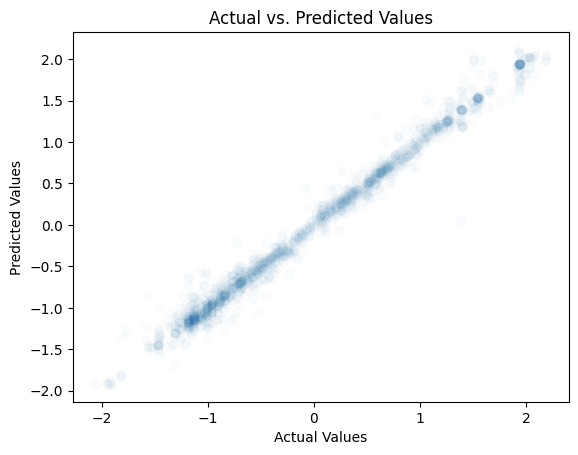

Importances for e_uds_median


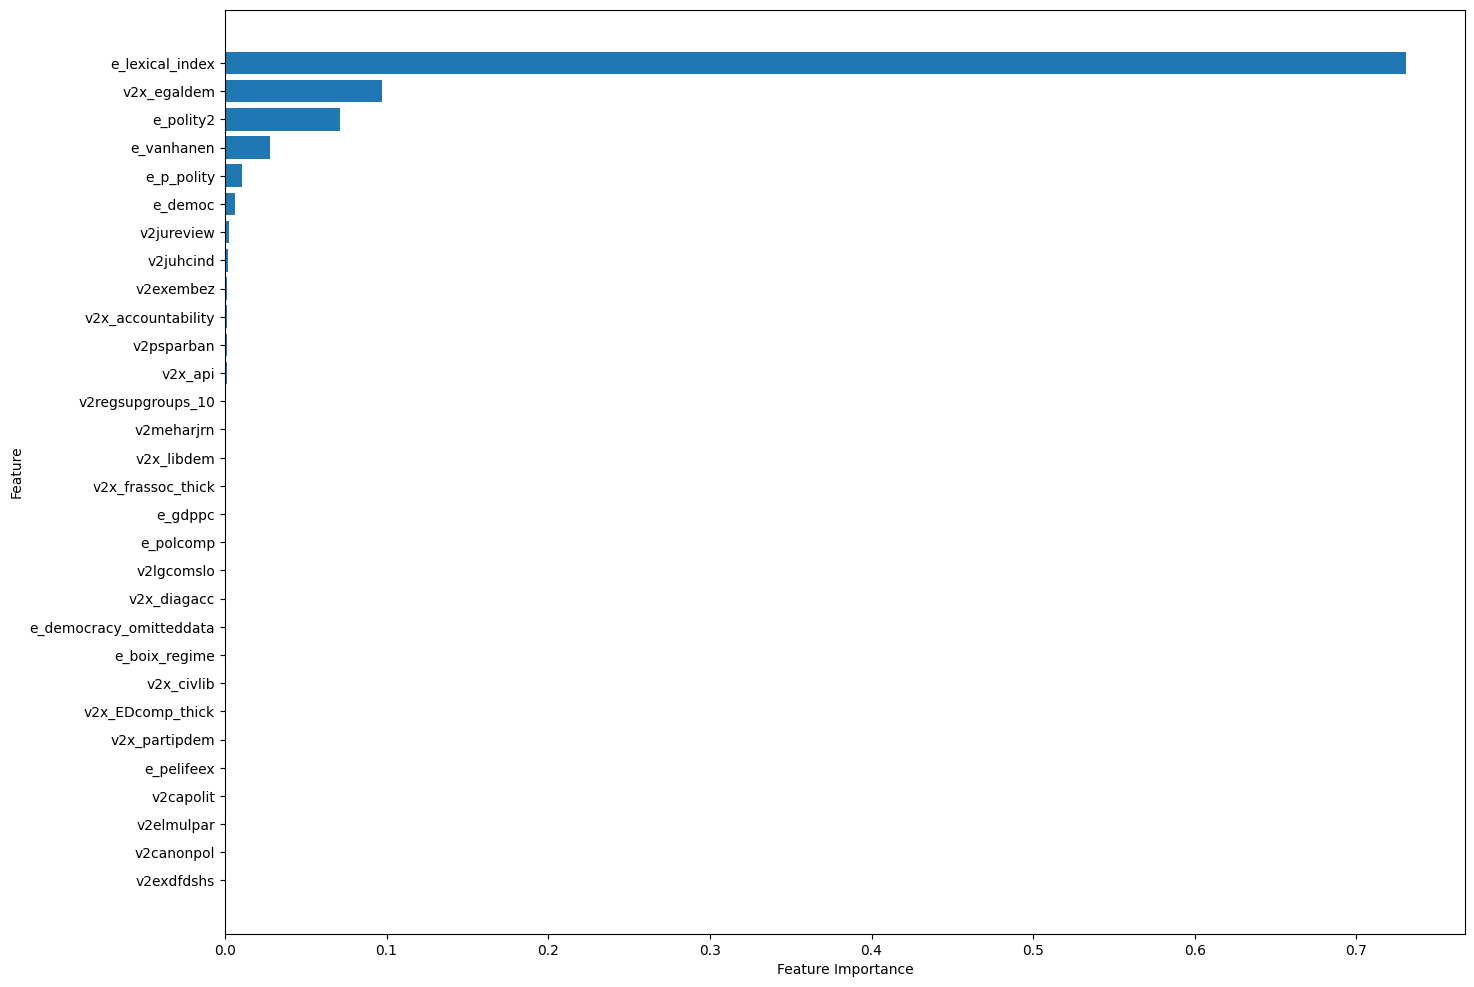

In [23]:
uds_model, uds_top, uds_corrs = imputing_model(vdem_pop, 'e_uds_median')

In [24]:
vdem_pop['pred_status'] = status_model.predict(vdem_pop[status_top])
vdem_pop['pred_cl'] = cl_model.predict(vdem_pop[cl_top])
vdem_pop['pred_pr'] = pr_model.predict(vdem_pop[pr_top])
vdem_pop['pred_uds'] = uds_model.predict(vdem_pop[uds_top])

In [25]:
vdem_pop.describe()

,country_id,year,project,historical,codingstart,codingend,codingstart_contemp,codingend_contemp,codingstart_hist,codingend_hist,...,e_pechmor,e_miinteco,e_civil_war,e_miinterc,e_pt_coup,e_pt_coup_attempts,pred_status,pred_cl,pred_pr,pred_uds
count,10729.000000,10729.000000,10729.000000,10729.000000,10729.000000,10729.000000,10729.000000,10729.000000,4492.000000,4492.000000,...,10267.000000,6341.000000,6677.000000,6341.000000,9509.000000,9509.000000,10729.000000,10729.000000,10729.000000,10729.000000
mean,96.736881,1992.536956,0.006338,0.418678,1868.147824,2022.737720,1910.344487,2022.737720,1802.082814,1922.870882,...,82.546254,0.055985,0.079976,0.136414,0.022190,0.044694,2.029080,4.011744,4.114922,-0.009843
std,57.743616,18.437591,0.112414,0.493365,61.466914,3.108226,22.461710,3.108226,22.611022,11.170000,...,83.343056,0.229911,0.271276,0.343255,0.155639,0.238317,0.817576,1.914526,2.208158,0.922034
min,3.000000,1960.000000,0.000000,0.000000,1789.000000,1975.000000,1900.000000,1975.000000,1789.000000,1918.000000,...,1.470000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,-1.943824
25%,49.000000,1977.000000,0.000000,0.000000,1789.000000,2023.000000,1900.000000,2023.000000,1789.000000,1920.000000,...,16.900000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,2.000000,-0.767985
50%,92.000000,1993.000000,0.000000,0.000000,1900.000000,2023.000000,1900.000000,2023.000000,1789.000000,1920.000000,...,50.600000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,4.000000,4.000000,-0.188634
75%,140.000000,2009.000000,0.000000,1.000000,1903.000000,2023.000000,1912.000000,2023.000000,1811.000000,1920.000000,...,126.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,6.000000,6.000000,0.656096
max,236.000000,2023.000000,2.000000,1.000000,2011.000000,2023.000000,2011.000000,2023.000000,1878.000000,2010.000000,...,423.000000,1.000000,1.000000,1.000000,2.000000,4.000000,3.000000,7.000000,7.000000,2.150875


In [26]:
vdem_pop.to_csv('vdem_pop_preds.csv')